Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Jay Patel"
COLLABORATORS = ""

---

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jay Patel"
COLLABORATORS = ""

In [ ]:
Meta Stock Analysis

---

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
meta_data = pd.read_csv("META.csv")  # Replace with the path to your dataset
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data.set_index('Date', inplace=True)

In [32]:
Preproccesing, The code begins by inspecting the datasets structure and contents using meta_data.columns to list column names, meta_data.head to preview the first few rows, and meta_data.describe to generate summary statistics. Missing values are checked with meta_data.isnull().sum(), and forward fill (ffill) is applied to handle them. 
All numeric columns are ensured to be properly typed using apply(pd.to_numeric, errors='coerce').

SyntaxError: invalid syntax (1797147052.py, line 1)

In [33]:
meta_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [34]:
meta_data.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-03  181.880005  184.779999  181.330002  184.669998  184.669998   
2018-01-04  184.899994  186.210007  184.100006  184.330002  184.330002   
2018-01-05  185.589996  186.899994  184.929993  186.850006  186.850006   
2018-01-08  187.199997  188.899994  186.330002  188.279999  188.279999   
2018-01-09  188.699997  188.800003  187.100006  187.869995  187.869995   
...                ...         ...         ...         ...         ...   
2023-12-26  354.989990  356.980011  353.450012  354.829987  354.829987   
2023-12-27  356.070007  359.000000  355.309998  357.829987  357.829987   
2023-12-28  359.700012  361.899994  357.809998  358.320007  358.320007   
2023-12-29  358.989990  360.000000  351.820007  353.959991  353.959991   
2024-01-02  351.320007  353.160004  340.010010  346.290009  346.290009   

       

In [35]:
meta_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,225.073857,228.245838,222.095328,225.212200,225.212200,2.414811e+07
std,68.302017,68.897817,67.640720,68.291138,68.291138,1.628735e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,5.467500e+06
25%,174.500000,176.899994,172.039993,174.600006,174.600006,1.539570e+07
50%,202.179993,204.910004,199.669998,202.259995,202.259995,2.008990e+07
75%,279.190002,285.239990,276.309998,281.000000,281.000000,2.788780e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [36]:
# Check for missing values
missing_values = meta_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Handle missing values (example: forward fill)
meta_data.fillna(method='ffill', inplace=True)

Missing values per column:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [37]:
# Ensure all numeric columns are properly typed
meta_data = meta_data.apply(pd.to_numeric, errors='coerce')

# Confirm the index is datetime
meta_data.index = pd.to_datetime(meta_data.index)

In [38]:
meta_data['Daily_Range'] = meta_data['High'] - meta_data['Low']
meta_data['Price_Change_%'] = ((meta_data['Close'] - meta_data['Open']) / meta_data['Open']) * 100

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meta_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(
    meta_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
)

In [40]:
A histogram of daily percentage changes is plotted to show the distribution of price fluctuations, 
helping identify patterns or outliers in price behavior. This preprocessing ensures the data is clean, 
consistent, and ready for analysis or modeling.

SyntaxError: invalid syntax (1069806596.py, line 1)

In [ ]:
# Plot closing price over time
plt.figure(figsize=(12, 6))
plt.plot(meta_data.index, meta_data['Close'], label='Closing Price')
plt.title('META Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (Normalized)')
plt.legend()
plt.show()

# Histogram of daily price changes
plt.figure(figsize=(8, 5))
plt.hist(meta_data['Price_Change_%'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Daily Price Changes (%)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()


In [42]:
The code focuses on analyzing and visualizing the impact of the Meta transition announcement on October 28, 2021. 
It first defines the event date and sets a 10-day window before and after the event for analysis. 
The dataset is filtered to include only data within this window, enabling a focused examination of stock behavior. 
A dual-axis plot is created to visualize the normalized closing prices and trading volumes during this period. 
The closing prices are plotted as a blue line on the primary y-axis, while trading volumes are represented as gray bars on a secondary y-axis. 
A vertical red dashed line marks the event date to highlight its significance. Labels, a title, and a legend are added for clarity, providing insights into how stock prices and trading volumes behaved in the days surrounding the announcement.

SyntaxError: invalid syntax (4184182735.py, line 1)

In [ ]:
# Define the event date and the analysis window
event_date = '2021-10-28'
pre_event_window = 10  # Days before the event
post_event_window = 10  # Days after the event

# Filter data for 10 days before and after the event
event_data = meta_data.loc[
    (meta_data.index >= pd.to_datetime(event_date) - pd.Timedelta(days=pre_event_window)) &
    (meta_data.index <= pd.to_datetime(event_date) + pd.Timedelta(days=post_event_window))
]

# Plot the normalized closing price and volume
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stock price (normalized)
ax1.plot(event_data.index, event_data['Close'], color='blue', label='Normalized Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Price', color='blue')
ax1.axvline(pd.to_datetime(event_date), color='red', linestyle='--', label='Meta Transition Announcement')
ax1.tick_params(axis='y', labelcolor='blue')

# Volume (normalized, secondary y-axis)
ax2 = ax1.twinx()
ax2.bar(event_data.index, event_data['Volume'], color='gray', alpha=0.3, label='Normalized Volume')
ax2.set_ylabel('Normalized Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Title and layout
fig.tight_layout()
plt.title('META Stock Price and Volume Around Transition to Meta (Oct 28, 2021)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.85))
plt.show()


In [44]:
# Function to calculate annualized return and risk (standard deviation)
def calculate_risk_return(data):
    # Create a copy of the data
    data = data.copy()

    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()

    # Drop NaN values in daily returns
    data = data.dropna(subset=['Daily_Return'])

    # Calculate average daily return
    avg_daily_return = data['Daily_Return'].mean()

    # Annualized return (assuming 252 trading days per year)
    annualized_return = (1 + avg_daily_return) ** 252 - 1

    # Annualized risk (standard deviation)
    daily_std_dev = data['Daily_Return'].std()
    annualized_risk = daily_std_dev * np.sqrt(252)

    return annualized_return, annualized_risk

In [45]:
# Load the dataset (replace 'META.csv' with your dataset path)
meta_data = pd.read_csv("META.csv")
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data.set_index('Date', inplace=True)

# Filter the data for the period after October 28, 2021
post_event_data = meta_data[meta_data.index >= pd.to_datetime('2021-10-28')]

# Function to calculate annualized risk (standard deviation)
def calculate_risk(data):
    # Create a copy of the data
    data = data.copy()

    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()

    # Drop NaN values in daily returns
    data = data.dropna(subset=['Daily_Return'])

    # Check if there is enough data
    if len(data) < 2:
        return None  # Return None if insufficient data
    
    # Annualized risk (standard deviation)
    daily_std_dev = data['Daily_Return'].std()
    annualized_risk = daily_std_dev * np.sqrt(252)

    return annualized_risk

In [46]:
This code performs a comprehensive analysis of the annualized return and risk (standard deviation) of META stock, segmented into overall, bull market, and bear market periods. The calculate_risk_return function computes daily returns, annualized return, and annualized risk using the dataset, assuming 252 trading days per year. 
For enhanced precision, a separate calculate_risk function calculates risk alone by deriving the standard deviation of daily returns.
The dataset is preprocessed by converting dates to a datetime format and setting them as the index. Post-event data is filtered for a period after October 28, 2021, and the overall dataset is analyzed for annualized return and risk. 
Bull and bear markets are defined based on whether the closing price is above or below the 50-day moving average. The respective annualized returns and risks are calculated for these conditions.
The results, including annualized return and risk for the overall period, bull market, and bear market, are printed. 
A bar chart visually compares these metrics, with green bars representing returns and red bars showing risks. This visualization highlights the performance and variability of META stock under different market conditions, providing insights into its risk-return profile.

SyntaxError: invalid syntax (1072990759.py, line 1)

Overall Period:
  Annualized Return: 21.93%
  Annualized Risk (Standard Deviation): 42.77%

Bull Market:
  Annualized Return: 35.92%
  Annualized Risk (Standard Deviation): 45.96%

Bear Market:
  Annualized Return: 97.89%
  Annualized Risk (Standard Deviation): 117.19%



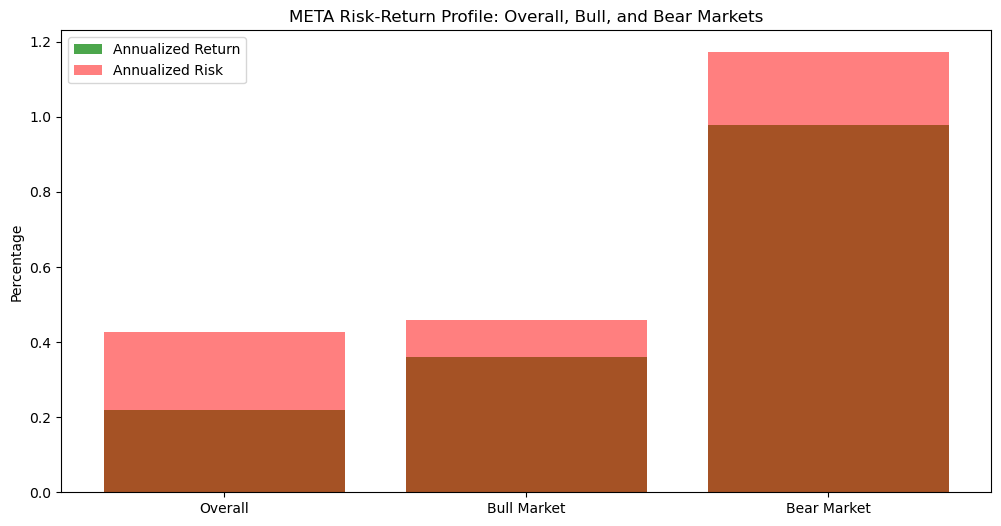

In [47]:
# Load the dataset (replace 'META.csv' with the correct path)
meta_data = pd.read_csv("META.csv")
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data.set_index('Date', inplace=True)

# Calculate risk and return for the entire period
annualized_return, annualized_risk = calculate_risk_return(meta_data)

# Bull and Bear Markets
bull_market = meta_data[meta_data['Close'] > meta_data['Close'].rolling(window=50).mean()]
bear_market = meta_data[meta_data['Close'] <= meta_data['Close'].rolling(window=50).mean()]

# Calculate risk and return for bull and bear markets
bull_return, bull_risk = calculate_risk_return(bull_market)
bear_return, bear_risk = calculate_risk_return(bear_market)

# Print results
print(f"Overall Period:")
print(f"  Annualized Return: {annualized_return:.2%}")
print(f"  Annualized Risk (Standard Deviation): {annualized_risk:.2%}\n")

print(f"Bull Market:")
print(f"  Annualized Return: {bull_return:.2%}")
print(f"  Annualized Risk (Standard Deviation): {bull_risk:.2%}\n")

print(f"Bear Market:")
print(f"  Annualized Return: {bear_return:.2%}")
print(f"  Annualized Risk (Standard Deviation): {bear_risk:.2%}\n")

# Visualization
plt.figure(figsize=(12, 6))

# Plot overall period returns and risks
categories = ['Overall', 'Bull Market', 'Bear Market']
returns = [annualized_return, bull_return, bear_return]
risks = [annualized_risk, bull_risk, bear_risk]

plt.bar(categories, returns, color='green', alpha=0.7, label='Annualized Return')
plt.bar(categories, risks, color='red', alpha=0.5, label='Annualized Risk')

plt.title('META Risk-Return Profile: Overall, Bull, and Bear Markets')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [48]:
# Calculate risk for post-event period
post_event_risk = calculate_risk(post_event_data)

# Print post-event risk
if post_event_risk is not None:
    print(f"Post-Event Risk (Annualized Standard Deviation): {post_event_risk:.2%}")
else:
    print("Not enough data to calculate post-event risk.")

Post-Event Risk (Annualized Standard Deviation): 52.28%


In [49]:
This code implements a machine learning approach using linear regression to predict META stocks closing prices based on lag features. The dataset is first loaded and prepared by converting dates into datetime format and setting them as the index. Lag features (Lag_1 and Lag_2), representing the previous days and two days before closing prices, are created to serve as predictors for the target variable, Close. 
Rows with missing values, resulting from the lag feature creation, are dropped to ensure a clean dataset.
The features (Lag_1, Lag_2) are standardized using StandardScaler to normalize their values, improving the regression models performance. The dataset is then split into training and testing sets, with 80% of the data used for training and 20% for testing, ensuring that the data is not shuffled to preserve the time-series nature.
A linear regression model is trained on the scaled training data. Predictions are made on the test set, and the model's performance is evaluated using metrics such as Mean Squared Error (MSE) and the R² score. The results are printed to assess the accuracy and explanatory power of the model.
Finally, a visualization is created to compare the actual and predicted closing prices over the test period. The green line represents the actual closing prices, while the red dashed line shows the model's predictions, providing a clear visual indication of how well the linear regression model performs in predicting stock prices based on lagged features.

SyntaxError: unterminated string literal (detected at line 4) (1464794427.py, line 4)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
meta_data = pd.read_csv("META.csv")  # Replace with your dataset path
meta_data['Date'] = pd.to_datetime(meta_data['Date'])
meta_data.set_index('Date', inplace=True)

# Use closing prices as the target variable
closing_prices = meta_data['Close']

# Create lag features
meta_data['Lag_1'] = meta_data['Close'].shift(1)  # Previous day's price
meta_data['Lag_2'] = meta_data['Close'].shift(2)  # Two days before
meta_data = meta_data.dropna()  # Drop rows with NaN values due to shifting

# Define features (lags) and target
X = meta_data[['Lag_1', 'Lag_2']]
y = meta_data['Close']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='green')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--')
plt.title('META Stock Price Prediction (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [51]:
# Analyze MSE
print(f"Mean Squared Error: {mse:.2f}")
mse_relative = mse / y_test.mean()
print(f"Relative MSE (MSE as a percentage of mean target value): {mse_relative:.2%}")

# Analyze R² Score
print(f"R² Score: {r2:.2f}")

# Interpretation
if r2 > 0.8:
    print("Good model performance, The model explains most of the variance.")
elif r2 > 0.5:
    print("Moderate performance. Consider adding more features to improve accuracy.")
else:
    print("Low performance. The model may not be capturing important predictors.")

Mean Squared Error: 32.60
Relative MSE (MSE as a percentage of mean target value): 13.77%
R² Score: 0.99
Good model performance, The model explains most of the variance.


In [52]:
This code integrates the META.csv dataset into an SQLite database to enable efficient data storage and querying. The dataset is first loaded using pandas, and the Date column is converted to a datetime format for consistency. An SQLite connection is established to create or connect to a database named meta_stock.db. 
A table named meta_stock is defined with columns for each attribute in the dataset, including Date, Open, High, Low, Close, Adj_Close, and Volume. 
The id column is set as the primary key, which auto-increments to uniquely identify each row. Using a loop, each row in the pandas DataFrame is iterated over and inserted into the SQLite table. The INSERT INTO query is used, with the Date column formatted as YYYY-MM-DD to ensure proper storage as a text type. 
After inserting all rows, the transaction is committed to save the data persistently in the database.

SyntaxError: invalid syntax (1157156420.py, line 1)

In [53]:
import sqlite3
import pandas as pd

# Load the dataset (replace 'META.csv' with your dataset path)
meta_data = pd.read_csv("META.csv")
meta_data['Date'] = pd.to_datetime(meta_data['Date'])

# Establish SQLite connection
conn = sqlite3.connect('meta_stock.db')  # Create or connect to 'meta_stock.db'
cursor = conn.cursor()


In [54]:
# Create a table for META stock data
create_table_sql = '''
CREATE TABLE IF NOT EXISTS meta_stock (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    Date TEXT NOT NULL,
    Open REAL NOT NULL,
    High REAL NOT NULL,
    Low REAL NOT NULL,
    Close REAL NOT NULL,
    Adj_Close REAL NOT NULL,
    Volume INTEGER NOT NULL
);
'''
cursor.execute(create_table_sql)
conn.commit()

In [55]:
# Insert data into the table
for index, row in meta_data.iterrows():
    cursor.execute('''
        INSERT INTO meta_stock (Date, Open, High, Low, Close, Adj_Close, Volume)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['Date'].strftime('%Y-%m-%d'),
        row['Open'],
        row['High'],
        row['Low'],
        row['Close'],
        row['Adj Close'],
        row['Volume']
    ))

# Commit the transaction
conn.commit()

In [56]:
# Test query to ensure the data is in the database
cursor.execute("SELECT * FROM meta_stock LIMIT 5;")
rows = cursor.fetchall()

# Display the fetched rows
if rows:
    for row in rows:
        print(row)
else:
    print("No data found in the table.")


(1, '2018-01-03', 181.880005, 184.779999, 181.330002, 184.669998, 184.669998, 16886600)
(2, '2018-01-04', 184.899994, 186.210007, 184.100006, 184.330002, 184.330002, 13880900)
(3, '2018-01-05', 185.589996, 186.899994, 184.929993, 186.850006, 186.850006, 13574500)
(4, '2018-01-08', 187.199997, 188.899994, 186.330002, 188.279999, 188.279999, 17994700)
(5, '2018-01-09', 188.699997, 188.800003, 187.100006, 187.869995, 187.869995, 12393100)


In [57]:
cursor.execute("SELECT AVG(Close) AS Average_Close FROM meta_stock;")
avg_close = cursor.fetchone()[0]
print(f"Average Closing Price: {avg_close:.2f}")

Average Closing Price: 225.21


In [58]:
cursor.execute("SELECT Date, Close FROM meta_stock ORDER BY Close DESC LIMIT 1;")
highest_close = cursor.fetchone()
print(f"Highest Closing Price: {highest_close[1]:.2f} on {highest_close[0]}")

Highest Closing Price: 382.18 on 2021-09-07


In [59]:
cursor.execute("""
    SELECT 
        strftime('%Y-%m', Date) AS Month, 
        AVG(Close) AS Avg_Close
    FROM meta_stock
    GROUP BY Month
    ORDER BY Month;
""")
monthly_averages = cursor.fetchall()
print("Monthly Average Closing Prices:")
for month, avg_close in monthly_averages:
    print(f"{month}: {avg_close:.2f}")

Monthly Average Closing Prices:
2018-01: 185.14
2018-02: 180.27
2018-03: 173.49
2018-04: 163.81
2018-05: 182.93
2018-06: 195.27
2018-07: 199.97
2018-08: 177.49
2018-09: 164.38
2018-10: 154.19
2018-11: 141.64
2018-12: 137.16
2019-01: 145.42
2019-02: 164.81
2019-03: 167.41
2019-04: 180.54
2019-05: 186.08
2019-06: 181.27
2019-07: 199.60
2019-08: 184.50
2019-09: 185.74
2019-10: 184.38
2019-11: 195.72
2019-12: 201.95
2020-01: 216.64
2020-02: 207.51
2020-03: 165.75
2020-04: 177.00
2020-05: 216.55
2020-06: 232.05
2020-07: 239.21
2020-08: 268.79
2020-09: 266.55
2020-10: 269.78
2020-11: 276.31
2020-12: 276.53
2021-01: 264.61
2021-02: 266.34
2021-03: 275.51
2021-04: 307.75
2021-05: 317.34
2021-06: 336.43
2021-07: 353.38
2021-08: 363.02
2021-09: 363.97
2021-10: 328.67
2021-11: 336.53
2021-12: 330.85
2022-01: 319.41
2022-02: 228.44
2022-03: 207.26
2022-04: 208.24
2022-05: 197.74
2022-06: 173.50
2022-07: 167.36
2022-08: 168.56
2022-09: 149.96
2022-10: 127.92
2022-11: 106.40
2022-12: 117.96
2023-01:

In [60]:
cursor.execute("""
    SELECT 
        Date, 
        Open, 
        Close, 
        (Close - Open) AS Recovery
    FROM meta_stock
    WHERE (Close - Open) > 10
    ORDER BY Recovery DESC;
""")
recovery_days = cursor.fetchall()
print("Days with Significant Price Recovery:")
for row in recovery_days:
    print(f"Date: {row[0]}, Open: {row[1]:.2f}, Close: {row[2]:.2f}, Recovery: {row[3]:.2f}")


Days with Significant Price Recovery:
Date: 2020-08-26, Open: 284.00, Close: 303.91, Recovery: 19.91
Date: 2020-08-26, Open: 284.00, Close: 303.91, Recovery: 19.91
Date: 2020-08-26, Open: 284.00, Close: 303.91, Recovery: 19.91
Date: 2020-08-26, Open: 284.00, Close: 303.91, Recovery: 19.91
Date: 2020-08-26, Open: 284.00, Close: 303.91, Recovery: 19.91
Date: 2022-02-24, Open: 191.06, Close: 207.60, Recovery: 16.54
Date: 2022-02-24, Open: 191.06, Close: 207.60, Recovery: 16.54
Date: 2022-02-24, Open: 191.06, Close: 207.60, Recovery: 16.54
Date: 2022-02-24, Open: 191.06, Close: 207.60, Recovery: 16.54
Date: 2022-02-24, Open: 191.06, Close: 207.60, Recovery: 16.54
Date: 2020-08-06, Open: 249.04, Close: 265.28, Recovery: 16.24
Date: 2020-08-06, Open: 249.04, Close: 265.28, Recovery: 16.24
Date: 2020-08-06, Open: 249.04, Close: 265.28, Recovery: 16.24
Date: 2020-08-06, Open: 249.04, Close: 265.28, Recovery: 16.24
Date: 2020-08-06, Open: 249.04, Close: 265.28, Recovery: 16.24
Date: 2023-10-06,